In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm , t

## Generating normally distributed sample data

norm.rvs() has keyword parameters
- location parameter (center of the distribution, population mean)
- scale parameter (width of the distribution, population standard deviation)


```
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
```



We use here an example motivated by the Albany April daily mean temp climatology (unit5):

- mean=47.7 F
- stddev=8.7 F

In [21]:
n=1000# 30 days * 10 years
m=47.7
s=4.0
x=norm.rvs(loc=m,scale=s,size=n)
ypos=np.zeros(n)

print(f"sample mean {(np.mean(x)):.2f} and standard deviation {(np.std(x)):.2f}")

sample mean 47.70 and standard deviation 4.12


999 0.54,1.96, 0.13


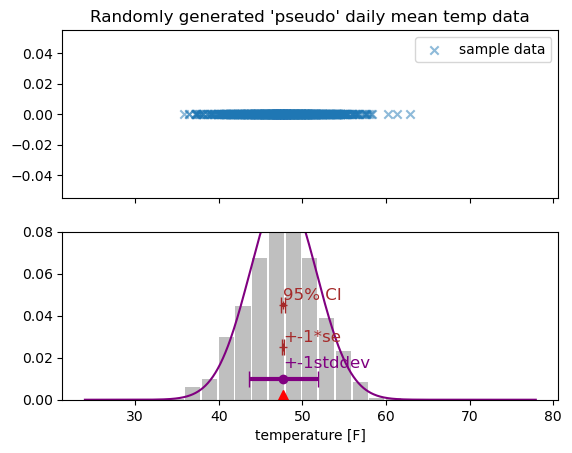

In [22]:
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].scatter(x,ypos,marker='x',label='sample data',alpha=0.5)
ax[0].legend()
ax[0].set_title("Randomly generated 'pseudo' daily mean temp data")
ax[1].hist(x,bins=np.arange(24,78,2),color='gray',alpha=0.5,
           width=1.8,density=True)
ax[1].set_xlabel("temperature [F]")


# 2023-04-13 add more for confidence interval calculations.
ax[1].set_ylim(0,0.08)

# add normal distribution PDF
temp_range=np.arange(24,78,0.1)
pdf=norm.pdf(temp_range,loc=m,scale=s)

ax[1].plot(temp_range,pdf,color='purple')


#2023-04-13
# add the population mean
ax[1].plot(m,0,'^',markersize=14,color='red')

# add the sample mean
msample=np.mean(x)
sdsample=np.std(x)
ax[1].errorbar(msample,0.01,xerr=sdsample,
               fmt='o', linewidth=3, color='purple',capsize=6)

ax[1].text(msample,0.015, '+-1stddev',color='purple',
           fontsize=12)

# add standard error of the mean
n=len(x)
sesample=sdsample/np.sqrt(n)
ax[1].errorbar(msample,0.025,xerr=sesample,
               fmt='+', linewidth=3, color='brown',capsize=6)
ax[1].text(msample,0.0275, '+-1*se',color='brown',
           fontsize=12)
# add the confidence intervals
df=n-1
t95=t.interval(0.95,df)
t95=t95[1] # only the positive value
print(f"{df} {CI:.2f},{t95:.2f}, {sesample:.2f}")
CI=t95*sesample

sesample=sdsample/np.sqrt(n)
ax[1].errorbar(msample,0.045,xerr=CI,
               fmt='+', linewidth=3, color='brown',capsize=6)
ax[1].text(msample,0.0475, '95% CI',color='brown',
           fontsize=12)
fig.show()


In [23]:
### (20230-04-10) Illustration: 95% confidence interval around the calculated mean


In [5]:
# sample size 30
n=30
m=27.0 # true mean
s=11.0
icount=0
print("calculated mean and lower and upper conf range" )
kmax=1000
for k in range(kmax):
    x=norm.rvs(loc=m,scale=s,size=n)
    mcalc=x.mean()
    df=n-1
    se=x.std()/np.sqrt(n)
    t95= t.interval(0.95,df)
    
    print(f"mcalc={mcalc:.3f} {(t95[0]*se+mcalc):.3f} - {(t95[1]*se+mcalc):.3f}")
    lower=(t95[0]*se+mcalc)
    upper=(t95[1]*se+mcalc)
    if (lower<m<upper):
        icount+=1
    else:
        print("true mean not in 95%CI")
print("percent of true mean inside 95%CI")
print(icount/kmax*100)



calculated mean and lower and upper conf range
mcalc=27.232 23.128 - 31.336
mcalc=26.994 22.736 - 31.252
mcalc=31.384 26.713 - 36.055
mcalc=26.882 22.026 - 31.739
mcalc=24.460 19.836 - 29.084
mcalc=25.217 21.612 - 28.823
mcalc=26.404 22.653 - 30.156
mcalc=32.031 27.990 - 36.072
true mean not in 95%CI
mcalc=29.826 26.725 - 32.927
mcalc=28.656 24.851 - 32.462
mcalc=28.917 24.509 - 33.325
mcalc=28.061 23.573 - 32.549
mcalc=22.204 17.392 - 27.017
mcalc=26.240 22.304 - 30.176
mcalc=26.431 22.380 - 30.482
mcalc=25.603 21.240 - 29.966
mcalc=26.230 22.192 - 30.269
mcalc=26.943 23.162 - 30.725
mcalc=29.734 25.746 - 33.722
mcalc=23.664 18.790 - 28.539
mcalc=29.776 25.193 - 34.360
mcalc=28.642 25.087 - 32.196
mcalc=29.943 26.018 - 33.869
mcalc=26.091 21.995 - 30.186
mcalc=25.099 20.893 - 29.306
mcalc=28.746 24.842 - 32.649
mcalc=26.189 22.156 - 30.222
mcalc=28.726 24.289 - 33.163
mcalc=26.698 22.548 - 30.847
mcalc=27.205 23.069 - 31.341
mcalc=25.582 21.897 - 29.266
mcalc=27.965 24.114 - 31.816
mc

In [12]:
print(t95)
print(type(t95))

(-2.045229642132703, 2.045229642132703)
<class 'tuple'>


In [9]:
t95[1]


2.045229642132703